<a href="https://colab.research.google.com/github/SeanMuInCa/learn_python/blob/master/scraping_news_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import random
import pandas as pd
import time

is_scraping = True # status
current_page = 1 # page#
max_pages = 10 # maximum page
max_retries = 3 # retry times
retry_delay = 5 # delay seconds
user_agents = [
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
  'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
  'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36',
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15',
  'Mozilla/5.0 (Macintosh; Intel Mac OS X 13_1) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'
]
headers = {'User-Agent': random.choice(user_agents)} #define headers

contents = []
def getData():
  return requests.get(f"https://news.ycombinator.com/?p={current_page}", headers=headers)


while is_scraping and current_page <= max_pages:
  retries = 0 # reset retry times
  while retries < max_retries:# can retry
    try:
      response = getData()# get data
      if response.status_code == 200:# success
          contents.append(response.content)
          current_page += 1
          break
      else:# failed
        raise Exception(f"Failed to fetch page {current_page}. Status code: {response.status_code}")
    except Exception as e:
        print(f"Error fetching page {current_page}: {e}")
        retries += 1# retry time + 1
        time.sleep(retry_delay)  # wait 5 seconds

    if retries == max_retries: # after max retry times
        print(f"Failed to fetch page after {max_retries} retries.")
        break
    if current_page > max_pages or retries == max_retries:# can not continue
        is_scraping = False
print("Scraping complete.")

Scraping complete.


In [ ]:
from bs4 import BeautifulSoup

parsedList = []
for content in contents:
  soup = BeautifulSoup(content, 'html.parser')
  for tr in soup.find_all('tr', class_='athing'):# all the information we need is inside the tr tag with classname athing
    title = tr.find('span', class_='titleline') if title else 'No Title'
    rank = tr.find('span', class_='rank').text.replace('.', '') if rank else 'No Rank'
    url = tr.find('span', class_='titleline').find('a')['href'] if url else 'No URL'
    points = int(tr.find_next('span', class_='score').text.replace(' points', '')) if points else 0
    parsedList.append([rank, title.find('a').text, url, points])

df = pd.DataFrame(parsedList, columns=['rank', 'title', 'url', 'points']).sort_values(by='points', ascending=True)
df.to_csv('assignment3_ZhenghuaMu.csv', index=False)

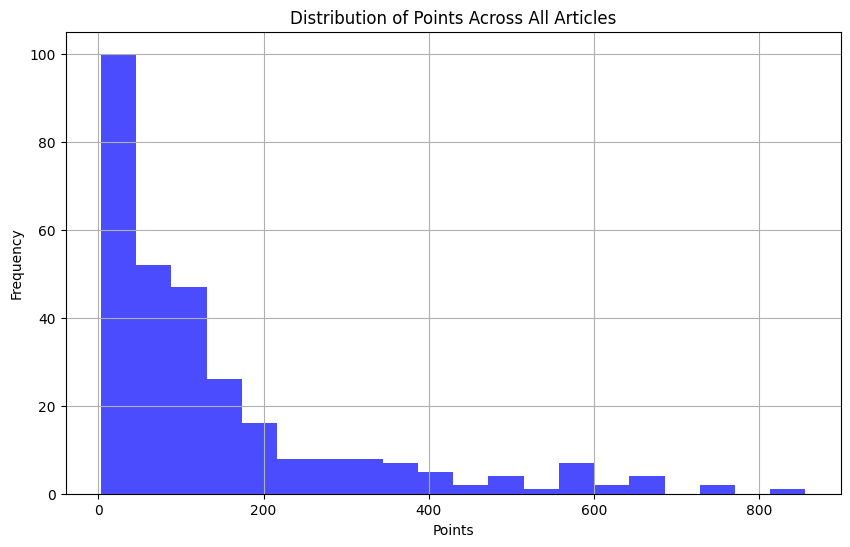

In [ ]:
import matplotlib.pyplot as plt
# Histogram: Plot a histogram to show the distribution of points across all scraped articles.
plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Points Across All Articles')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



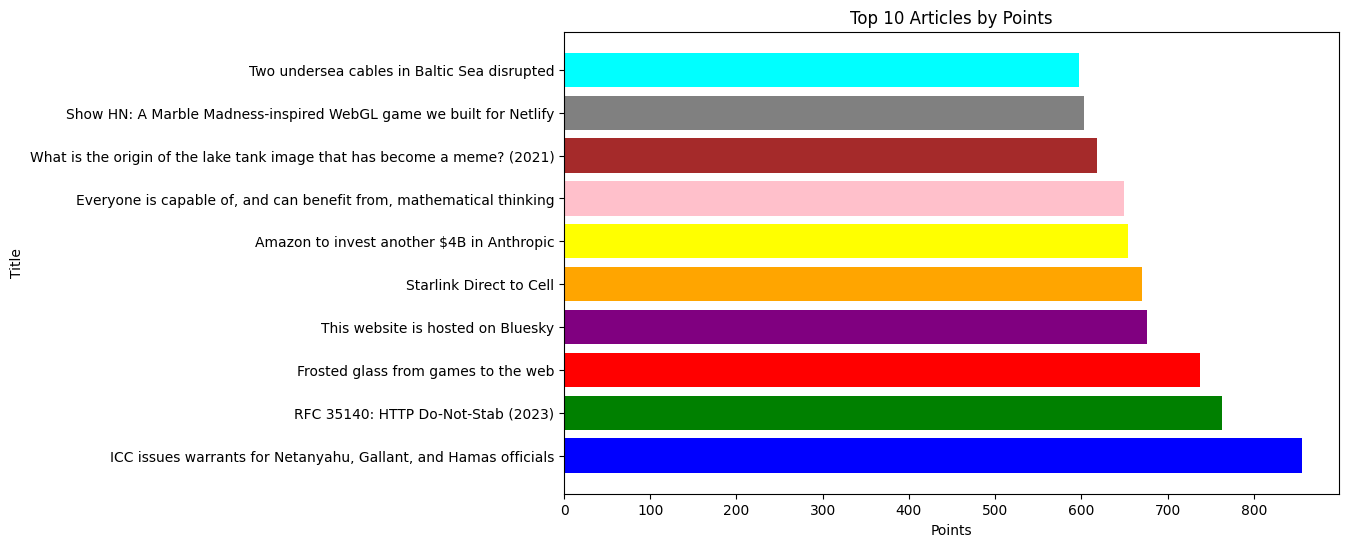

In [ ]:
# Bar Plot: Display a bar plot of the top 10 articles with the highest points.
top10Articles = df.nlargest(10, 'points')
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink', 'brown', 'gray', 'cyan']
plt.figure(figsize=(10, 6))
plt.barh(top10Articles['title'], top10Articles['points'], color=colors)
plt.xlabel('Points')
plt.ylabel('Title')
plt.title('Top 10 Articles by Points')
plt.show()

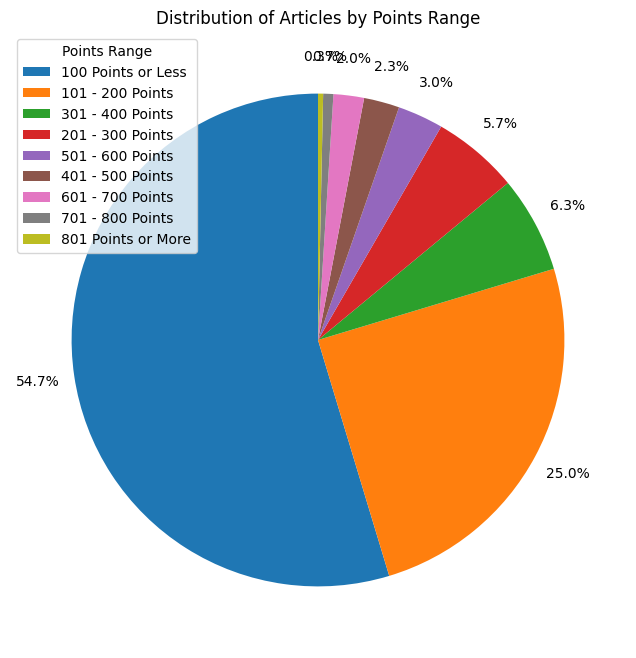

In [ ]:
# Pie Chart: Create a pie chart to show the distribution of articles in different points ranges
def getPointsRange(points):
  if points <= 100:
    return '100 Points or Less'
  elif points <= 200:
    return '101 - 200 Points'
  elif points <= 300:
    return '201 - 300 Points'
  elif points <= 400:
    return '301 - 400 Points'
  elif points <= 500:
    return '401 - 500 Points'
  elif points <= 600:
    return '501 - 600 Points'
  elif points <= 700:
    return '601 - 700 Points'
  elif points <= 800:
    return '701 - 800 Points'
  else:
    return '801 Points or More'
df['range'] = df['points'].apply(getPointsRange)
pointRanges = df['range'].value_counts()

plt.figure(figsize=(20, 8))
plt.pie(pointRanges, autopct='%1.1f%%', startangle=90, pctdistance=1.15)
plt.title('Distribution of Articles by Points Range')


plt.legend(pointRanges.index, title='Points Range', loc='upper left')

plt.show()


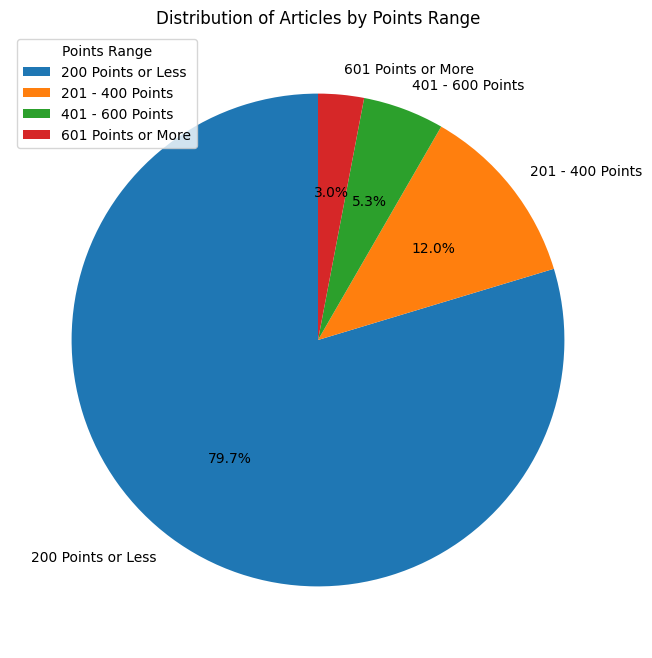

In [ ]:
# Pie Chart: Create a pie chart to show the distribution of articles in different points ranges
def getPointsRange(points):
  if points <= 200:
    return '200 Points or Less'
  elif points <= 400:
    return '201 - 400 Points'
  elif points <= 600:
    return '401 - 600 Points'
  else:
    return '601 Points or More'
df['range'] = df['points'].apply(getPointsRange)
pointRanges = df['range'].value_counts()

plt.figure(figsize=(20, 8))
plt.pie(pointRanges, labels=pointRanges.index,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Articles by Points Range')


plt.legend(pointRanges.index, title='Points Range', loc='upper left')

plt.show()
